**Linear Regression**


**Objectives**


Use sklearn to implement Linear Regression
Create a model, train it, test it and use the model

Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np



## Understanding the Data

### `FuelConsumptionRatings.csv`:
I have downloaded a fuel consumption dataset, **`FuelConsumptionRatings.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. FORD
- **MODEL** e.g. FOCUS FFV
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 2.0
- **CYLINDERS** e.g 4.0	
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 11.7	
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.5	
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 10.3
- **CO2 EMISSIONS (g/km)** e.g. 165.0   --> low --> 0


## Reading the data in


In [17]:
df = pd.read_csv("D:\Ashvini\Data Science\Data for practise\Fuel Consumption Ratings.csv",encoding='cp1252')

# take a look at the dataset


df.sample(5)


,MODEL_YEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
5138,2014,NISSAN,JUKE,STATION WAGON - SMALL,1.6,4.0,M6,Z,9.5,7.6,8.6,198.0
1275,2011,CHEVROLET,HHR,SUV,2.4,4.0,A4,E,15.3,11.1,13.4,214.0
1412,2011,FORD,F150,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,14.5,10.6,12.7,292.0
5295,2014,TOYOTA,TACOMA 4WD,PICKUP TRUCK - SMALL,4.0,6.0,M6,X,15.3,12.3,14.0,322.0
88,2010,BMW,335i xDRIVE COUPE,SUBCOMPACT,3.0,6.0,A6,Z,13.8,9.4,11.8,271.0


In [23]:
b= df.iloc[:,11]

### Data Exploration
Let's first have a descriptive exploration on our data.


In [7]:
# summarize the data
df.describe()

,ENGINESIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
count,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000
mean,3.491901,5.962120,13.902650,9.932208,12.116328,267.660198
std,1.390957,1.872838,4.162894,2.807196,3.524127,64.317040
min,1.000000,2.000000,4.500000,4.900000,4.700000,108.000000
25%,2.400000,4.000000,11.000000,8.000000,9.700000,221.000000
50%,3.500000,6.000000,13.200000,9.300000,11.400000,260.000000
75%,4.600000,8.000000,16.000000,11.200000,13.900000,305.000000
max,8.400000,16.000000,30.400000,20.800000,26.000000,566.000000


In [8]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Let's select some features to explore more.


In [24]:
df1 = df[['ENGINESIZE','CYLINDERS','FUEL_CONSUMPTION_COMB']]
df1['CO2EMISSIONS']=b
df1.head(10)


,ENGINESIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,9.5,219.0
1,2.0,4.0,8.9,205.0
2,2.0,4.0,10.0,230.0
3,3.7,6.0,13.2,304.0
4,2.3,4.0,11.9,274.0
5,3.7,6.0,12.9,297.0
6,3.5,6.0,11.2,258.0
7,3.7,6.0,11.9,274.0
8,3.7,6.0,11.6,267.0
9,2.4,4.0,9.5,219.0


In [11]:
df1.shape

(5384, 4)

In [12]:
df1.isnull().sum()

ENGINESIZE               25
CYLINDERS                25
FUEL_CONSUMPTION_COMB    25
CO2EMISSIONS             25
dtype: int64

In [13]:
cdf=df1.dropna()
cdf.head()

,ENGINESIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,9.5,219.0
1,2.0,4.0,8.9,205.0
2,2.0,4.0,10.0,230.0
3,3.7,6.0,13.2,304.0
4,2.3,4.0,11.9,274.0


In [14]:
cdf.shape

(5359, 4)

We can plot each of these features:


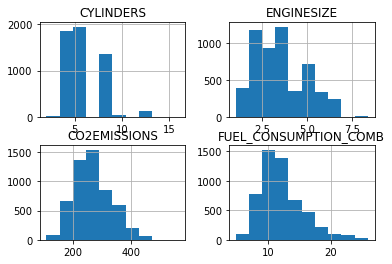

In [15]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUEL_CONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


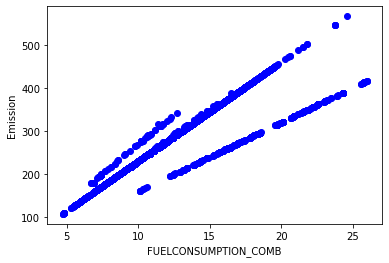

In [12]:
plt.scatter(cdf.FUEL_CONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUEL_CONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

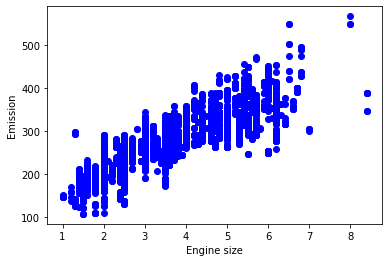

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

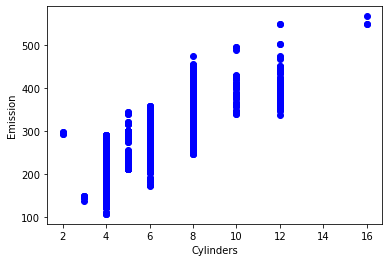

In [14]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()



#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. 


### Linear Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value y_pred using linear approximation. 


#### Modeling
Using sklearn package to model data.


In [26]:
X=cdf.drop(['CO2EMISSIONS'],axis=1)
X.head()

,ENGINESIZE,CYLINDERS,FUEL_CONSUMPTION_COMB
0,2.0,4.0,9.5
1,2.0,4.0,8.9
2,2.0,4.0,10.0
3,3.7,6.0,13.2
4,2.3,4.0,11.9


In [27]:
y=cdf[['CO2EMISSIONS']]
y.head()

,CO2EMISSIONS
0,219.0
1,205.0
2,230.0
3,304.0
4,274.0


In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20, random_state=42)

model.fit(X_train,y_train)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[8.7203566  8.91670506 9.71723427]]
Intercept:  [66.23566913]


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [29]:
from sklearn.metrics import r2_score

y_pred=model.predict(X_test)


print("score is ",model.score(X_test,y_test))

score is  0.8506702675088298


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (y_pred) over all samples in the dataset.



In [19]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 18.14
Residual sum of squares (MSE): 613.77
R2-score: 0.82
